In [1]:
#compare the CV values of czechowski et al 2005 (microarray) and those from the RNA-seq in Mergner et al 2020

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# def make_plot(df,x_variable, y_variable,x_label, y_label, output_prefix, plot_kind):
#     """function to make and save plot"""
#     #allow colour codes in seaborn
#     sns.set(color_codes=True)
#     sns.set_style("whitegrid")
#     #plot
#     plot = sns.catplot(x=x_variable, y=y_variable, data=df, kind=plot_kind)
#     #plot points
#     ax = sns.swarmplot(x=x_variable, y=y_variable, data=df, color=".25")
#     #change axes labels
#     plt.ylabel(y_label)
#     plt.xlabel(x_label)
#     #save figure
#     ax.get_figure().savefig(f'../../data/output/{file_names}/{dependent_variable}/plots/{output_prefix}_{plot_kind}.pdf', format='pdf')   

In [81]:
def all_prom_distribution(df, x_variable, x_label, df2=pd.DataFrame()):
    """function to return distribution plot of all promoters GC content""" 
    if df2.empty:
    
        dist_plot = df[x_variable]
        #create figure with no transparency
        dist_plot_fig = sns.distplot(dist_plot).get_figure()
        plt.xlabel(x_label)
    else:
        dist_plot1 = df[x_variable]
        dist_plot2 = df2[x_variable]
        sns.distplot(dist_plot1,hist=False, rug=True)
        sns.distplot(dist_plot2,hist=False, rug=True).get_figure()

    #save to file
    #dist_plot_fig.savefig(f'../../data/output/{file_names}/{dependent_variable}/plots/{output_prefix}_distribution.pdf', format='pdf')    

In [33]:
czechowski = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_czechowski_constitutive_variable_random.txt'
czechowski_all = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_czechowski_allfilteredgenes.txt'
mergner = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_mergner_constitutive_variable_random.txt'
mergner_all = '../../data/output/non-overlapping_includingbidirectional_all_genes_newannotation/genes/promoters_5UTR_mergner_allfilteredgenes.txt'

In [6]:
czechowski_df = pd.read_table(czechowski, sep='\t', header=None)
mergner_df = pd.read_table(mergner, sep='\t', header=None)
cols = ['AGI', 'gene_type']
czechowski_df.columns = cols
mergner_df.columns = cols

In [40]:
#read in all genes
czechowski_all_df = pd.read_table(czechowski_all, sep='\t', header=0)
mergner_all_df = pd.read_csv(mergner_all, sep='\t',header=0)

In [41]:
mergner_all_df

,chr,start,stop,AGI,dot1,strand,source,type,dot2,attributes,transcription_class,transcription_family,expression_CV,presence_in_araport11
0,1,2630,3759,AT1G01010,.,+,araport11,promoter,.,ID=gene:AT1G01010;Name=NAC001;biotype=protein_...,TF,NAC,0.945805,1.0
1,1,8666,10130,AT1G01020,.,-,araport11,promoter,.,ID=gene:AT1G01020;Name=ARV1;biotype=protein_co...,NaN,NaN,0.384746,1.0
2,1,12940,14714,AT1G01030,.,-,araport11,promoter,.,ID=gene:AT1G01030;Name=NGA3;biotype=protein_co...,TF,B3,1.094770,1.0
3,1,37061,38443,AT1G01060,.,-,araport11,promoter,.,ID=gene:AT1G01060;Name=LHY;biotype=protein_cod...,TF,MYB-related,0.877298,1.0
4,1,40877,42017,AT1G01070,.,-,araport11,promoter,.,ID=gene:AT1G01070;biotype=protein_coding;descr...,NaN,NaN,1.202535,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17642,5,26957073,26957914,AT5G67580,.,-,araport11,promoter,.,ID=gene:AT5G67580;Name=TRB2;biotype=protein_co...,TF,MYB-related,1.039561,1.0
17643,5,26963614,26964550,AT5G67610,.,-,araport11,promoter,.,ID=gene:AT5G67610;biotype=protein_coding;descr...,NaN,NaN,0.347671,1.0
17644,5,26965720,26967010,AT5G67620,.,-,araport11,promoter,.,ID=gene:AT5G67620;biotype=protein_coding;descr...,NaN,NaN,1.288362,1.0
17645,5,26969306,26969515,AT5G67630,.,-,araport11,promoter,.,ID=gene:AT5G67630;biotype=protein_coding;descr...,NaN,NaN,0.927208,1.0


In [12]:
inboth = czechowski_df[czechowski_df.AGI.isin(mergner_df.AGI)]
len(inboth[inboth.gene_type == 'constitutive'])

42

In [13]:
len(inboth[inboth.gene_type == 'variable'])

47

In [14]:
len(inboth[inboth.gene_type == 'random'])

0

In [8]:
mergner_df

,AGI,gene_type
0,AT1G01010,constitutive
1,AT1G01020,constitutive
2,AT1G01030,constitutive
3,AT1G01060,constitutive
4,AT1G01070,constitutive
...,...,...
295,AT4G08560,control
296,AT4G18870,control
297,AT4G33590,control
298,AT5G36657,control


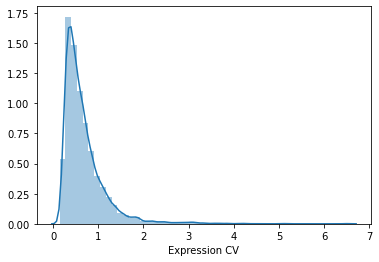

In [75]:
#all czechowski CV distribution plot
all_prom_distribution(czechowski_all_df,'expression_CV', 'Expression CV')

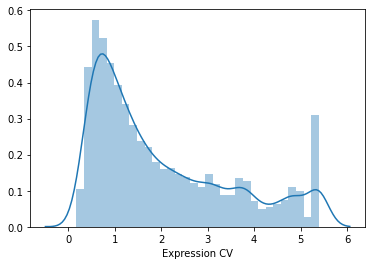

In [76]:
#all mergner CV distribution plot
all_prom_distribution(mergner_all_df,'expression_CV', 'Expression CV')

In [82]:
#plot CV from RNA-seq for top variable and top constitutive genes from microarray'
merged = pd.merge(czechowski_df,mergner_all_df, on='AGI', how='left')

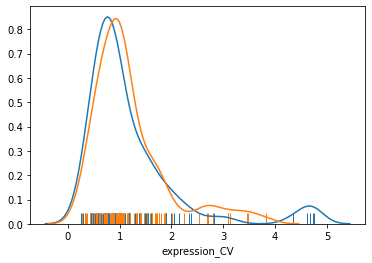

In [83]:
all_prom_distribution(merged[merged.gene_type == 'constitutive'],'expression_CV', 'Expression CV', merged[merged.gene_type == 'variable'])

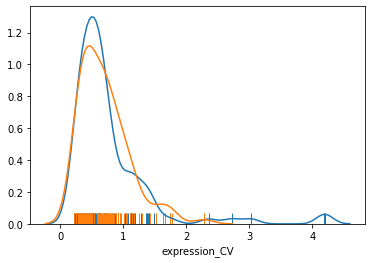

In [85]:
merged_czechowski =pd.merge(czechowski_df,czechowski_all_df, on='AGI', how='left')
all_prom_distribution(merged_czechowski[merged_czechowski.gene_type == 'constitutive'],'expression_CV', 'Expression CV',merged_czechowski[merged_czechowski.gene_type == 'variable'])

In [88]:
merged_czechowski[merged_czechowski.gene_type == 'constitutive']

,AGI,gene_type,chr,start,stop,dot1,strand,source,type,dot2,attributes,rank,probe_id,expression_mean,expression_SD,expression_CV,proportion_of_values_present_in_mas5,presence_in_araport11,constitutive_in_araport11
0,AT1G01060,constitutive,1,37061,38443,.,-,araport11,promoter,.,ID=gene:AT1G01060;Name=LHY;biotype=protein_cod...,8752.0,261569_at,659.659794,490.970711,0.744279,99.0,1.0,0.0
1,AT1G01080,constitutive,1,46789,47233,.,-,araport11,promoter,.,ID=gene:AT1G01080;biotype=protein_coding;descr...,8901.0,261577_at,384.087612,292.389851,0.761258,96.0,1.0,0.0
2,AT1G01090,constitutive,1,49166,49908,.,-,araport11,promoter,.,ID=gene:AT1G01090;Name=PDH-E1 ALPHA;biotype=pr...,7123.0,261583_at,2541.430002,1529.913875,0.601989,100.0,1.0,0.0
3,AT1G01100,constitutive,1,50954,51952,.,-,araport11,promoter,.,ID=gene:AT1G01100;Name=RPP1A;biotype=protein_c...,4823.0,261578_at,11304.396095,5166.610692,0.457044,100.0,1.0,0.0
4,AT1G01120,constitutive,1,58978,60215,.,-,araport11,promoter,.,ID=gene:AT1G01120;Name=KCS1;biotype=protein_co...,6864.0,261570_at,991.741578,578.774828,0.583594,96.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,AT1G03950,constitutive,1,1013212,1013642,.,-,araport11,promoter,.,ID=gene:AT1G03950;Name=VPS2.3;biotype=protein_...,7439.0,265044_at,189.360761,118.835293,0.627560,82.0,1.0,0.0
96,AT1G03960,constitutive,1,1013365,1014084,.,+,araport11,promoter,.,ID=gene:AT1G03960;Name=B%27%27EPSILON;biotype=...,5577.0,265090_at,57.451047,28.656442,0.498798,97.0,1.0,0.0
97,AT1G03970,constitutive,1,1017957,1018236,.,+,araport11,promoter,.,ID=gene:AT1G03970;Name=GBF4;biotype=protein_co...,5192.0,265040_at,165.576926,78.844624,0.476181,98.0,1.0,0.0
98,AT1G04000,constitutive,1,1028873,1030119,.,-,araport11,promoter,.,ID=gene:AT1G04000;biotype=protein_coding;descr...,5788.0,265039_at,164.011576,83.718713,0.510444,100.0,1.0,0.0


In [89]:
merged_czechowski[merged_czechowski.gene_type == 'variable']

,AGI,gene_type,chr,start,stop,dot1,strand,source,type,dot2,attributes,rank,probe_id,expression_mean,expression_SD,expression_CV,proportion_of_values_present_in_mas5,presence_in_araport11,constitutive_in_araport11
100,AT5G64840,variable,5,25919693,25921254,.,-,araport11,promoter,.,ID=gene:AT5G64840;Name=ABCF5;biotype=protein_c...,9103.0,247222_at,1231.334245,966.494112,0.784916,98.0,1.0,0.0
101,AT5G64850,variable,5,25920401,25921584,.,+,araport11,promoter,.,ID=gene:AT5G64850;biotype=protein_coding;descr...,8506.0,247214_at,434.935723,313.125845,0.719936,97.0,1.0,0.0
102,AT5G64860,variable,5,25928788,25929431,.,-,araport11,promoter,.,ID=gene:AT5G64860;Name=DPE1;biotype=protein_co...,6157.0,247216_at,445.275881,237.325208,0.532985,95.0,1.0,0.0
103,AT5G64880,variable,5,25931384,25932352,.,+,araport11,promoter,.,ID=gene:AT5G64880;biotype=protein_coding;descr...,8801.0,247211_at,270.420724,202.529844,0.748944,97.0,1.0,0.0
104,AT5G64900,variable,5,25936077,25937252,.,+,araport11,promoter,.,ID=gene:AT5G64900;Name=PEP1;biotype=protein_co...,11237.0,247213_at,173.861399,224.955125,1.293876,93.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,AT5G67460,variable,5,26923274,26924488,.,-,araport11,promoter,.,ID=gene:AT5G67460;biotype=protein_coding;descr...,10771.0,246994_at,143.437529,158.091065,1.102160,94.0,1.0,0.0
196,AT5G67490,variable,5,26934694,26935074,.,-,araport11,promoter,.,ID=gene:AT5G67490;biotype=protein_coding;descr...,5261.0,247006_at,937.252790,449.548526,0.479645,100.0,1.0,0.0
197,AT5G67560,variable,5,26949184,26950578,.,+,araport11,promoter,.,ID=gene:AT5G67560;Name=ARL8B;biotype=protein_c...,3814.0,247008_at,711.205117,287.266875,0.403916,97.0,1.0,0.0
198,AT5G67580,variable,5,26957073,26957914,.,-,araport11,promoter,.,ID=gene:AT5G67580;Name=TRB2;biotype=protein_co...,206.0,247012_at,61.548600,13.354799,0.216980,100.0,1.0,0.0
